In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


In [2]:
data = pd.read_csv('Meter_1.csv')
print (data.head())
print ('\n Data Types:')
print( data.dtypes)

  Date Invoice Date Period Start Date Period End Meter Set Name  Size  \
0    7/12/2019         6/11/2019       7/12/2019  Single Meter      2   
1    6/10/2019         5/10/2019       6/10/2019  Single Meter      2   
2    5/10/2019         4/12/2019       5/10/2019  Single Meter      2   
3    4/11/2019         3/13/2019       4/11/2019  Single Meter      2   
4    3/12/2019         2/13/2019       3/12/2019  Single Meter      2   

   Count Factor  PriorRead  Current Read   Usage  Units  
0           748      49349         50103  563992  754.0  
1           748      48713         49349  475728  636.0  
2           748      48075         48713  477224  638.0  
3           748      47527         48075  409904  548.0  
4           748      47087         47527  329120  440.0  

 Data Types:
Date Invoice          object
Date Period Start     object
Date Period End       object
Meter Set Name        object
Size                   int64
Count Factor           int64
PriorRead              in

In [3]:
data_forecast = data[["Date Period Start","Units"]]
data_forecast["Date Period Start"] = data_forecast["Date Period Start"].apply(lambda x : "/".join([x.split("/")[0],"1",x.split("/")[2]]))
# data_forecast

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
data_forecast = data_forecast.set_index("Date Period Start")
ts = data_forecast
# data_forecast

In [5]:
data_forecast.describe()

,Units
count,42.000000
mean,611.580357
std,107.049602
min,440.000000
25%,537.750000
50%,567.500000
75%,701.500000
max,820.000000


In [6]:
data_forecast.index

Index(['6/1/2019', '5/1/2019', '4/1/2019', '3/1/2019', '2/1/2019', '1/1/2019',
       '12/1/2018', '11/1/2018', '10/1/2018', '9/1/2018', '8/1/2018',
       '7/1/2018', '6/1/2018', '5/1/2018', '4/1/2018', '3/1/2018', '2/1/2018',
       '1/1/2018', '12/1/2017', '11/1/2017', '10/1/2017', '9/1/2017',
       '8/1/2017', '6/1/2017', '5/1/2017', '4/1/2017', '3/1/2017', '2/1/2017',
       '1/1/2017', '12/1/2016', '11/1/2016', '10/1/2016', '9/1/2016',
       '8/1/2016', '7/1/2016', '6/1/2016', '5/1/2016', '4/1/2016', '3/1/2016',
       '2/1/2016', '1/1/2016', '12/1/2015'],
      dtype='object', name='Date Period Start')

In [7]:
data_forecast.index = pd.to_datetime(data_forecast.index)

In [8]:
data_forecast = data_forecast.sort_index()

In [9]:
data_forecast.index

DatetimeIndex(['2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
               '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
               '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01',
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01'],
              dtype='datetime64[ns]', name='Date Period Start', freq=None)

In [10]:
data_forecast.loc['2018',:]

,Units
Date Period Start,
2018-01-01,494.0
2018-02-01,549.0
2018-03-01,544.0
2018-04-01,601.0
2018-05-01,774.0
2018-06-01,773.0
2018-07-01,816.0
2018-08-01,729.0
2018-09-01,488.0


In [11]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
#     print ('Results of Dickey-Fuller Test:')
#     dftest = adfuller(timeseries, autolag='AIC')
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print (dfoutput)

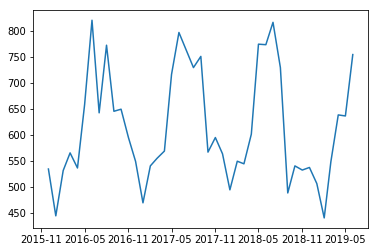

In [12]:
plt.plot(data_forecast)

In [13]:
# plt.plot(data_forecast.drop(data_forecast.iloc[-1].name,axis =0))
# data_forecast = data_forecast.drop(data_forecast.iloc[-1].name,axis =0)

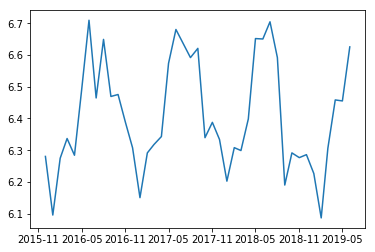

In [14]:
ts_log = np.log(data_forecast)
plt.plot(ts_log)

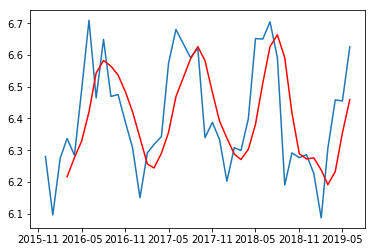

In [15]:
moving_avg = ts_log.rolling(4,win_type ='triang').mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

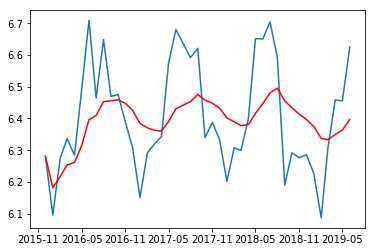

In [16]:
expwighted_avg = ts_log.ewm(halflife=5).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

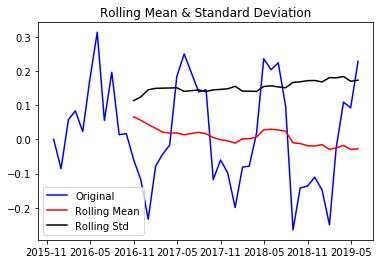

In [17]:
ts_log_ewma_diff = ts_log - expwighted_avg
# print(ts_log_ewma_diff)
test_stationarity(ts_log_ewma_diff)

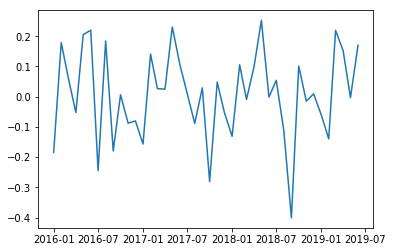

In [18]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

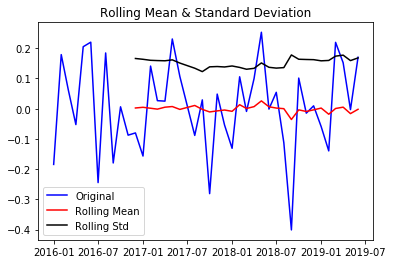

In [19]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [20]:
# ts_log

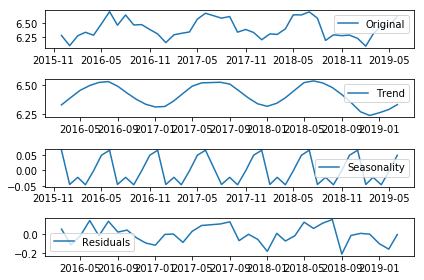

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq= 6)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

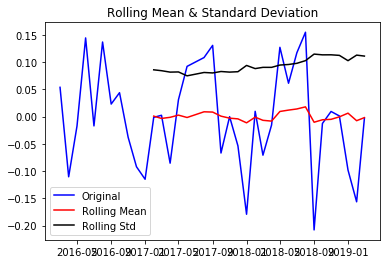

In [22]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [23]:
from statsmodels.tsa.stattools import acf, pacf

In [24]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

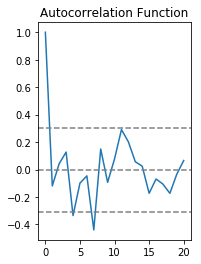

In [25]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

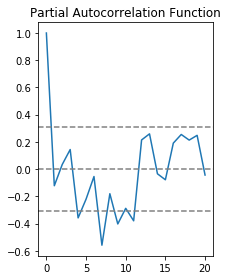

In [26]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [27]:
from statsmodels.tsa.arima_model import ARIMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'0.9026461553119602')

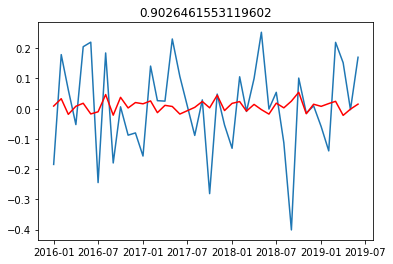

In [28]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)
# print(ts_log_diff)
# print(results_AR.fittedvalues-ts_log_diff)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title(sum((results_AR.fittedvalues-ts_log_diff.Units)**2))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: 0.8925')

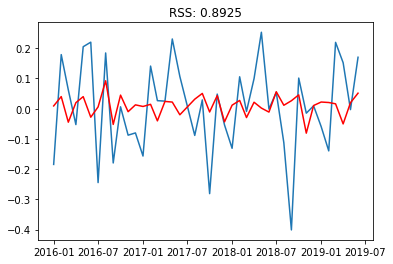

In [29]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff.Units)**2))

In [37]:
len(ts)

42

In [31]:
model = ARIMA(ts_log, order=(4,1,1))  
results_ARIMA = model.fit(disp=-1)  
forecast, stderr, conf = results_ARIMA.forecast(steps = 15)
# print(np.exp(forecast))
# print(conf)
prediction_arima = results_ARIMA.predict(start = 42 , end = 56)
# print(prediction_arima+ts_log.Units[-1])
predictions = prediction_arima+ts_log.Units[-1]
actual_values = np.exp(predictions)
# print(np.exp(predictions))
ts1 = ts.append(actual_values,ignore_index=True)
# ts1.plot()
# plt.plot(ts_log_diff)
# plt.plot(results_ARIMA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff.Units)**2))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [41]:
print(prediction_arima)
print(np.exp(forecast))
print(np.exp(predictions))

41   -0.052667
42   -0.083296
43   -0.039547
44   -0.117981
45   -0.044662
46    0.001755
47    0.008817
48    0.060722
49    0.054627
50    0.034911
51    0.023108
52   -0.011452
53   -0.028856
54   -0.032836
55   -0.032904
dtype: float64
[715.31686289 658.14814557 632.6285581  562.22544729 537.66759242
 538.61216631 543.38218865 577.39970954 609.81854303 631.48363801
 646.24577377 638.88734484 620.7152351  600.66436487 581.22150556]
41    715.316863
42    693.739694
43    724.763772
44    670.089868
45    721.065485
46    755.324626
47    760.677526
48    801.202892
49    796.334279
50    780.787447
51    771.626190
52    745.414636
53    732.553698
54    729.643652
55    729.593831
dtype: float64


In [33]:
act = actual_values.to_frame()
act

,0
41,715.316863
42,693.739694
43,724.763772
44,670.089868
45,721.065485
46,755.324626
47,760.677526
48,801.202892
49,796.334279
50,780.787447


In [ ]:
act.columns = ["Units"]
act.Units = np.exp(forecast)
act

AttributeError: 'int' object has no attribute 'toordinal'

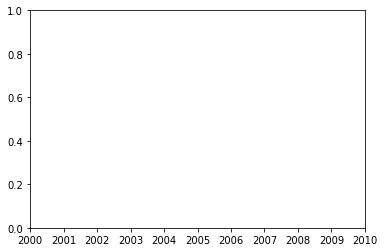

In [34]:

plt.plot(ts.append(act))

In [ ]:
conf_df = pd.DataFrame(conf)
conf_df

In [ ]:
conf_df = conf_df.apply(np.exp)
conf_df

In [ ]:
conf_df.plot()

In [ ]:
conf_df.index = act.index
conf_df.columns= ["Lower","Upper"]
conf_df

In [ ]:
new_df = ts.append(act)

In [ ]:
new_df = new_df.join(conf_df,how="left")
new_df

In [ ]:
new_df.plot()